In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np


In [3]:
N1, Z1, BE_EXP1 = np.loadtxt('same_N1.dat',usecols=(0,1,2), unpack= True)
A1 = Z1 + N1
az1 = np.vstack((A1,Z1))
x1 = az1

data1 = -BE_EXP1
ndata1 = len(data1)
P1 = open('results.out','w')
print('ndata=',ndata1, file=P1)

In [4]:
import pandas as pd



data = {'N1': N1, 'Z1': Z1, 'BE_EXP1': BE_EXP1}
df = pd.DataFrame(data)

In [5]:
df


,N1,Z1,BE_EXP1
0,1.0,1.0,2.016332
1,1.0,3.0,5.149790
2,2.0,1.0,3.928615
3,2.0,2.0,10.656310
4,2.0,3.0,8.026148
...,...,...,...
3316,176.0,114.0,0.584000
3317,176.0,115.0,0.440000
3318,176.0,116.0,0.732500
3319,176.0,117.0,0.441000


In [6]:
def calcdelta(dataframe,N1):
  dataframe

In [7]:
def calcdelta(dataframe, N1, Z1):
    try:
        a = dataframe['BE_EXP1'][(dataframe['N1'] == N1) & (dataframe['Z1'] == Z1 - 1)].values[0]
        b = dataframe['BE_EXP1'][(dataframe['N1'] == N1) & (dataframe['Z1'] == Z1 + 1)].values[0]
        c = dataframe['BE_EXP1'][(dataframe['N1'] == N1) & (dataframe['Z1'] == Z1)].values[0]
        return 0.5 * (a + b - 2 * c)
    except:
        return 0

In [8]:
calcdelta(df,1.0,1.0)

0

In [9]:
ans=[]
ans1=[]
ans2=[]

for i in range(0,len(df)-1):
  if df.iloc[i]['Z1']==1 or df.iloc[i]['Z1']==max(Z1) or calcdelta(df,df.iloc[i]['Z1'],df.iloc[i]['N1'])==0:
    continue

  ans.append(calcdelta(df,df.iloc[i]['Z1'],df.iloc[i]['N1']))
  ans1.append(df.iloc[i]['Z1'])
  ans2.append(df.iloc[i]['N1']+df.iloc[i]['Z1'])

print(ans)

[-4.67892889, -0.47578635, 0.42252254999999983, -0.5343088999999999, 1.3410401200000006, 1.87280225, 2.229331675, 1.008256, 0.4807479749999999, -0.3433331500000012, -2.2761780499999995, -4.77763185, -1.3122152500000002, -0.11201979999999967, -0.8517371250000001, -0.71164435, 0.9450231999999996, 1.2796782000000002, 1.178453, 0.9789678249999998, 0.7202343000000001, 0.705179, 0.4255166, 0.30499205000000007, -0.804552175, -2.4884257000000005, -1.16779945, -0.4157742499999997, -0.21504552499999985, -0.2789929000000002, 0.0442714500000001, 0.46996305000000005, 1.1772145750000007, 1.2776908, 0.44758342500000037, 0.03549004999999994, 0.37316277500000017, 0.5256800000000001, -0.5293617500000001, -0.22359635000000022, -0.44227704999999995, -1.7630965000000005, -0.781579325, -0.32300015000000015, -0.8261501999999998, -0.3917059999999999, -0.07859797499999921, 0.11828954999999985, 0.9620881000000003, 1.6416947000000002, 1.6331988, 1.06380345, 0.8059792499999998, 0.5037371500000001, 0.3240868999999

In [10]:
import matplotlib.pyplot as plt

In [11]:
def curve(x):
  return 4.66*(x**(-0.31))

In [12]:
ans3=[curve(i) for i in ans2]

In [13]:
abs_list = list()
for value in ans:
    absolute = abs(value)
    abs_list.append(absolute)

print(abs_list)

[4.67892889, 0.47578635, 0.42252254999999983, 0.5343088999999999, 1.3410401200000006, 1.87280225, 2.229331675, 1.008256, 0.4807479749999999, 0.3433331500000012, 2.2761780499999995, 4.77763185, 1.3122152500000002, 0.11201979999999967, 0.8517371250000001, 0.71164435, 0.9450231999999996, 1.2796782000000002, 1.178453, 0.9789678249999998, 0.7202343000000001, 0.705179, 0.4255166, 0.30499205000000007, 0.804552175, 2.4884257000000005, 1.16779945, 0.4157742499999997, 0.21504552499999985, 0.2789929000000002, 0.0442714500000001, 0.46996305000000005, 1.1772145750000007, 1.2776908, 0.44758342500000037, 0.03549004999999994, 0.37316277500000017, 0.5256800000000001, 0.5293617500000001, 0.22359635000000022, 0.44227704999999995, 1.7630965000000005, 0.781579325, 0.32300015000000015, 0.8261501999999998, 0.3917059999999999, 0.07859797499999921, 0.11828954999999985, 0.9620881000000003, 1.6416947000000002, 1.6331988, 1.06380345, 0.8059792499999998, 0.5037371500000001, 0.32408689999999996, 0.5335241, 0.389986

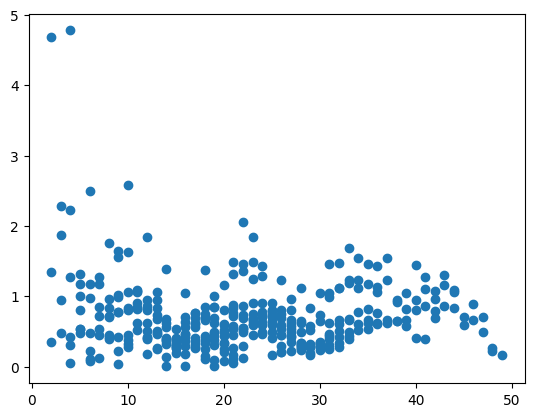

In [14]:
fig, ax = plt.subplots()


ax.scatter(ans1, abs_list)

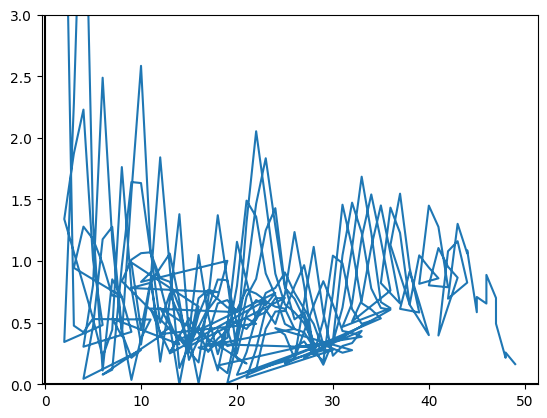

In [16]:
plt.plot(ans1, abs_list)
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.ylim(0, 3)
plt.show()